In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pykalman import KalmanFilter


In [9]:
path = "/kaggle/input/datakiemtra/data-kiem-tra-1.csv"
data = pd.read_csv(path, encoding="latin-1",)
data

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1
...,...,...,...,...,...,...
481817,03.05.2013,4,37,2437,799.00,1
481818,22.05.2013,4,37,2436,799.00,1
481819,03.05.2013,4,37,2436,799.00,1
481820,18.05.2013,4,37,2416,449.00,1


In [10]:
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
data=data.iloc[:int(0.5 * len(data))]

In [11]:
from pykalman import KalmanFilter

# Khởi tạo bộ lọc Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

In [12]:
# Áp dụng bộ lọc Kalman cho từng cột dữ liệu
#data['1_kalman'] = kf.smooth(data.iloc[:, 1].values)[0]
data['2_kalman'] = kf.smooth(data.iloc[:, 2].values)[0]
# data['3_kalman'] = kf.smooth(data.iloc[:, 3].values)[0]
# data['4_kalman'] = kf.smooth(data.iloc[:, 4].values)[0]
# data['5_kalman'] = kf.smooth(data.iloc[:, 5].values)[0]


/tmp/ipykernel_34/829149845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2_kalman'] = kf.smooth(data.iloc[:, 2].values)[0]


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [14]:
series = data['2_kalman']

# Kiểm tra tính dừng của dữ liệu bằng ADF test
result = adfuller(series.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Nếu dữ liệu không dừng (p-value > 0.05), thực hiện vi phân
if result[1] > 0.05:
    series = series.diff().dropna()


ADF Statistic: -3.2272922236075376
p-value: 0.01845826234158451


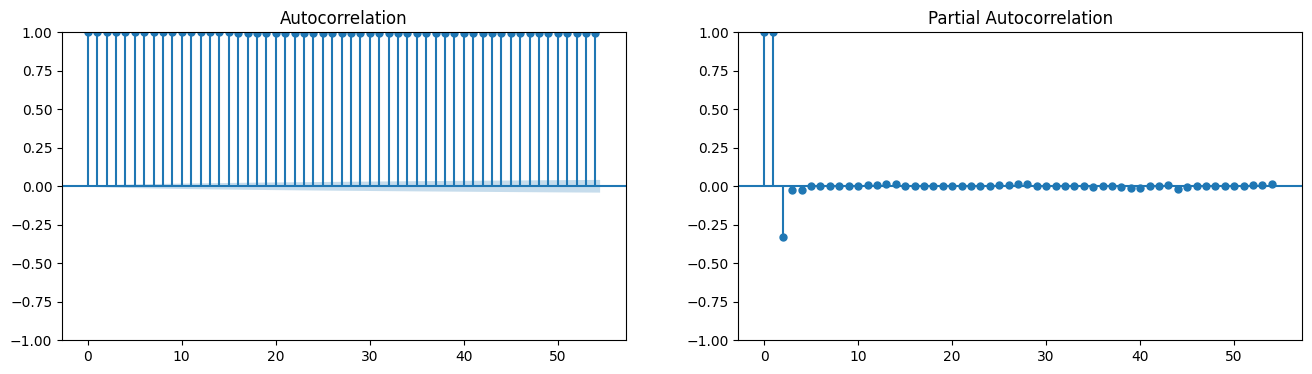

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(series, ax=axes[0])
plot_pacf(series, ax=axes[1])
plt.show()

In [16]:
# Khởi tạo và đào tạo mô hình ARIMA
model = ARIMA(series, order=(1,1,2))  # Thay đổi order nếu cần thiết
model_fit = model.fit()

# Tóm tắt mô hình
print(model_fit.summary())

# Dự báo
forecast_steps = 7  # Số bước dự báo
forecast = model_fit.forecast(steps=forecast_steps)

                               SARIMAX Results                                
Dep. Variable:               2_kalman   No. Observations:               240911
Model:                 ARIMA(1, 1, 2)   Log Likelihood              114275.941
Date:                Tue, 04 Jun 2024   AIC                        -228543.882
Time:                        02:11:25   BIC                        -228502.313
Sample:                             0   HQIC                       -228531.746
                             - 240911                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5355      0.001    720.721      0.000       0.534       0.537
ma.L1         -0.2164      0.001   -288.635      0.000      -0.218      -0.215
ma.L2         -0.0547      0.000   -200.870      0.0

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX # Define SARIMA parameters 
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality 
  
# Fit the SARIMA model 
model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
results = model.fit() 
model 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26663D-01    |proj g|=  1.89972D+00

At iterate    5    f= -3.85548D-01    |proj g|=  1.15326D-01

At iterate   10    f= -4.14500D-01    |proj g|=  1.95367D-01

At iterate   20    f= -4.71923D-01    |proj g|=  4.02813D-02
